In [16]:
import datetime
import numpy as np
import pandas as pd
from os import listdir
from datetime import date
import matplotlib.pyplot as plt
from os.path import isfile, join

In [17]:
# choose file to parse
experiment = 'logs/RUN3_LET6.7'

In [18]:
# load file
files = [f for f in listdir(experiment) if isfile(join(experiment, f))]
for i in range(len(files)):
    if files[i][0:6] == 'SEARCH':
        file = files[i]
        break
        
file = experiment + '/' + file

with open(file) as f:
    content = f.readlines()
content = [x.strip() for x in content] 

# get time data
for i in range(len(content)):
    if content[i][0:4] == '2019':
        content = content[i:]
        break
        
# break time-stamped data into a multi-dimensional array        
search = []        
for i in range(len(content)):
    temp = content[i].split()
    date_time_str = temp[0] + ' ' + temp[1]
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
    date = date_time_obj.date()
    time = date_time_obj.time()
    col3 = ''
    for i in range(len(temp[2:])):
        col3 = col3 + temp[i+2] + ' '
    col3 = col3[:-1]
    item = [date, time, col3]
    search.append(item)

# create pandas dataframe with time-stamped data
df = pd.DataFrame(search) 
df.head(10)

,0,1,2
0,2019-11-24,20:13:13.015325,before gnl setup
1,2019-11-24,20:13:13.015346,1
2,2019-11-24,20:13:14.126054,2
3,2019-11-24,20:13:14.126090,3
4,2019-11-24,20:13:14.126097,4
5,2019-11-24,20:13:14.157533,5
6,2019-11-24,20:13:14.170808,6
7,2019-11-24,20:13:14.170860,after gnl setup
8,2019-11-24,20:13:24.410601,searching knn_hamming !!!!!!!!!!!
9,2019-11-24,20:13:28.568938,search duration: 4.1583335399627686


In [19]:
times = df[1].tolist()
def get_time(beginning, end):
    t = datetime.datetime.combine(date.min, end) - datetime.datetime.combine(date.min, beginning)
    return t

t_seconds = []
for i in range(len(times)):
    t_seconds.append(get_time(times[0],times[i]))
    t_seconds[i] = t_seconds[i].total_seconds()
    
t_max = round(max(t_seconds), 2)
print('Test duration: ' + str(t_max) + ' seconds')

logs = df[2].tolist()
logs = [logs[i][:20] for i in range(len(logs))]

print(str(len(logs)) + ' data points recorded!')

Test duration: 256.1 seconds
127 data points recorded!


<function matplotlib.pyplot.show(*args, **kw)>

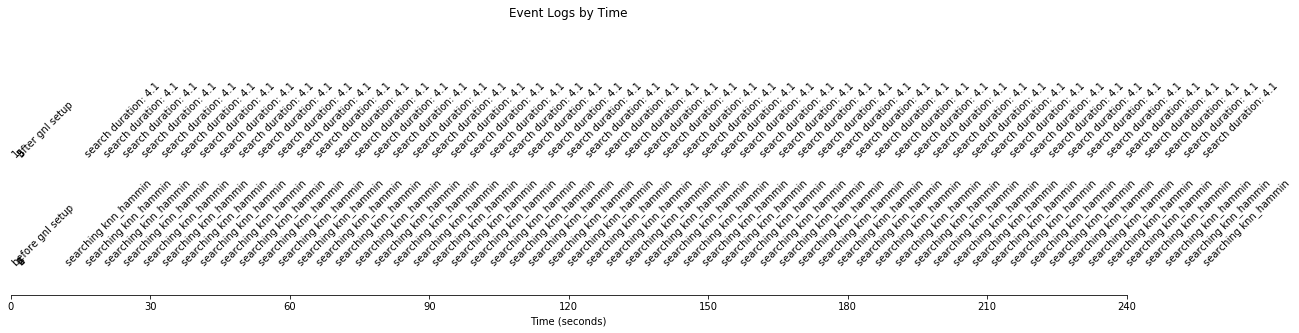

In [20]:
# plot test logs
#matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


lim = len(t_seconds)
mult = 5
#Max = t_seconds[lim*mult]
Max = t_seconds[len(t_seconds)-1]
interval = Max/10 + 10 - (Max/10)%10


def addtext(i,time, log, ax, props):
    if i%2 == 0:
        ax.text(time, 0.1, log, props, rotation=45)
    else:
        ax.text(time, 0.5, log, props, rotation=45)
    ax.grid(False)


fig, ax = plt.subplots(figsize=(20,5))

for i in range(lim):
    addtext(i,t_seconds[i], logs[i], ax, {'ha': 'left', 'va': 'bottom'})

ax.set_xticks(np.arange(0, Max, interval), [])
ax.set_xlabel('Time (seconds)')

## begone the right, left, top and bottom spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([], [])
ax.set_yticklabels([])
plt.title('Event Logs by Time')
plt.show